In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import time
import http
import os
from pathlib import Path

from cricket_helper_functions import get_innings_dataframe, insert_player_link, create_csv, parse_not_out, get_career_average_list

In [2]:
data = pd.read_csv("Initial_data.csv")

In [3]:
data

,ID,Batter,M,I,R,Avg
0,25,Tendulkar,463,452,18426,44.83
1,1413,Kohli,274,265,12898,57.32
2,29,S Ganguly,308,297,11221,40.95
3,27,Dravid,340,314,10768,39.16
4,265,Dhoni,347,294,10599,50.23
5,576,Rohit,243,236,9825,48.64
6,3864,M Azharuddin,334,308,9378,36.92
7,69,Yuvraj,301,275,8609,36.48
8,26,Sehwag,241,235,7995,35.38
9,1446,Dhawan,167,164,6793,44.11


## Is Sachin Tendulkar the Greatest Batsmen in Indian Cricket History

### 1. How does he fare against other Indian Batsmen?
* Comparing Runs
    - Look at total innings and then set the same innings for everyone
* Comparing Averages
    - Look at total innings and then set the same innings
    - Look at Averages over the course of a career
* Comparing Percentage of Runs
    - Look at how many runs were scored solely by Sachin versus the rest of the team
    - Look at the difference between Sachin and the second highest scorer
        - See first if he was the highest scorer, then see the difference and choose threshold
* Ratio of Centuries to Wins
    - How many of the 100 centuries came in wins
* Phases of Career
    - Look at runs and average for each year and find phases where he was at his best
    - Use the analytics methods previously used
        - Percentage of Team Total
            - How many came in wins
        - Difference between Sachin and the rest of the team
* Value of the runs
    - Factors to consider:
        - Percentage of Runs
        - Where the runs were scored
        - Whether the team won or not
        - Number of wickets that fell
        - More to add on this
* Can anyone come close....maybe one (Virat vs. Sachin)

#### 1.1 Comparing Runs

In [4]:
# Format the type of the columns
data[["M", "I", "R"]] = data[["M", "I", "R"]].astype(int)
data["Avg"] = data["Avg"].astype(float)

In [5]:
# Compare the number of runs scored by everyone in the top 10
top_10 = data.iloc[:10]
fig = px.pie(top_10, values = "R", names = "Batter", title="Top 10 Run Scorers in ODIs for India")
fig.show()


Text(0, 0.5, 'Runs')

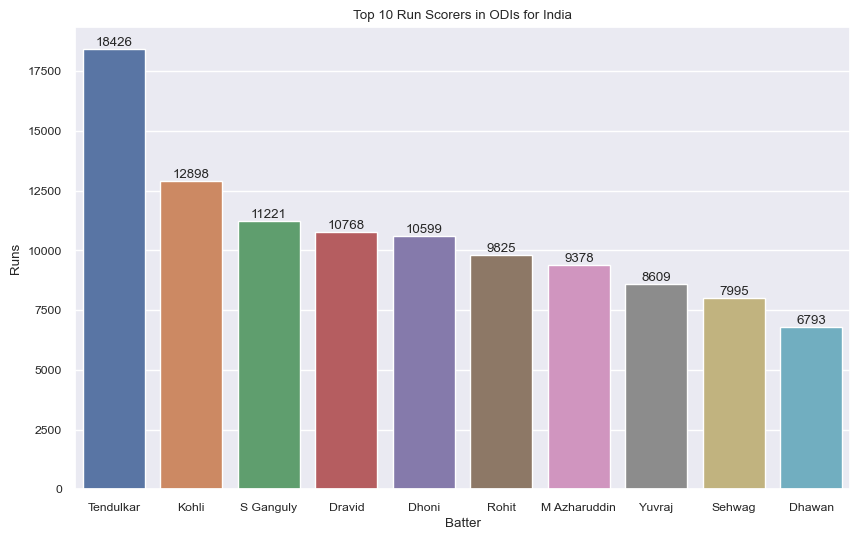

In [6]:
# Barplot comparing top 10 Runs Scorers
plt.figure(figsize=(10,6))
sns.set(font_scale = 0.8)
top_10_bar = sns.barplot(x = "Batter", y = "R", data=top_10)
for i in top_10_bar.containers:
    top_10_bar.bar_label(i,)
plt.title("Top 10 Run Scorers in ODIs for India")
plt.ylabel("Runs")

We can see that Tendulkar clearly has the most runs among anyone, however this could also be due to the fact that he batted in 452 innings, more than 100 innings greater than the next batsmen. In that case, we will even out the playing field and look at the runs that were scored in the first 200 innings.

In [7]:
# Look at runs after playing 200 innings
only_200 = data[data["I"] > 200]
only_200

,ID,Batter,M,I,R,Avg
0,25,Tendulkar,463,452,18426,44.83
1,1413,Kohli,274,265,12898,57.32
2,29,S Ganguly,308,297,11221,40.95
3,27,Dravid,340,314,10768,39.16
4,265,Dhoni,347,294,10599,50.23
5,576,Rohit,243,236,9825,48.64
6,3864,M Azharuddin,334,308,9378,36.92
7,69,Yuvraj,301,275,8609,36.48
8,26,Sehwag,241,235,7995,35.38


In [8]:
# Insert the names of the players in the top with 200 innings
insert_player_link("Sachin", "https://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Kohli", "https://stats.espncricinfo.com/ci/engine/player/253802.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Ganguly", "https://stats.espncricinfo.com/ci/engine/player/28779.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Dravid", "https://stats.espncricinfo.com/ci/engine/player/28114.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Dhoni", "https://stats.espncricinfo.com/ci/engine/player/28081.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Rohit", "https://stats.espncricinfo.com/ci/engine/player/34102.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Azharuddin", "https://stats.espncricinfo.com/ci/engine/player/26329.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Yuvraj", "https://stats.espncricinfo.com/ci/engine/player/36084.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Sehwag", "https://stats.espncricinfo.com/ci/engine/player/35263.html?class=2;template=results;type=batting;view=innings")

Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data


In [9]:
# Reading in the csv of the players and the cricinfo links
links_df = pd.read_csv("player_links.csv")

In [10]:
links_df

,Name,URL
0,Sachin,https://stats.espncricinfo.com/ci/engine/playe...
1,Kohli,https://stats.espncricinfo.com/ci/engine/playe...
2,Ganguly,https://stats.espncricinfo.com/ci/engine/playe...
3,Dravid,https://stats.espncricinfo.com/ci/engine/playe...
4,Dhoni,https://stats.espncricinfo.com/ci/engine/playe...
5,Rohit,https://stats.espncricinfo.com/ci/engine/playe...
6,Azharuddin,https://stats.espncricinfo.com/ci/engine/playe...
7,Yuvraj,https://stats.espncricinfo.com/ci/engine/playe...
8,Sehwag,https://stats.espncricinfo.com/ci/engine/playe...


In [11]:
def get_combined_player_innings(data, num_innings=None):
    players = data["Name"].tolist()
    urls = data["URL"].tolist()


    combined_players_innings = pd.DataFrame(columns=["Name", "Runs", "Average", "Not Out", "Innings"])
    for name, url in zip(players, urls):
        df = get_innings_dataframe(url)
        if num_innings is not None:
            df = df.iloc[:num_innings]
        num_not_out = sum(df["Dismissal"].str.contains("not out"))
        df = parse_not_out(df)
        runs = df["Runs"].astype(int).tolist()
        total_runs = sum(runs)

        avg = total_runs/(len(runs) - num_not_out)
        new_row = {"Name": name, "Runs": total_runs, "Average": avg, "Not Out": num_not_out, "Innings": num_innings}
        combined_players_innings = pd.concat([combined_players_innings, pd.DataFrame([new_row])], ignore_index=True)
    
    return combined_players_innings

only_200_df = get_combined_player_innings(links_df, num_innings=200)


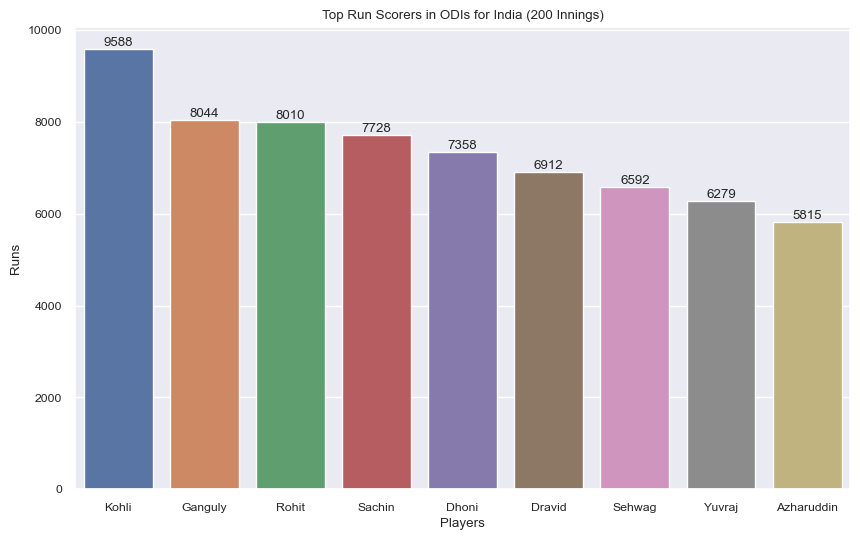

In [12]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 0.8)
ax = sns.barplot(data=only_200_df, x = "Name", y = "Runs", order=only_200_df.sort_values(by="Runs", ascending=False).Name)
ax.set_xlabel("Players")
ax.set_title("Top Run Scorers in ODIs for India (200 Innings)")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

As we can see, Sachin Tendulkar does not have the highest number of runs after 200 innings, he is in 4th place. We will see later that the averages will also suggest this.

There can be a few reasons why his number of runs is so low:
* Remember: his final tally after 452 innings (an additional 252 from this) is 18426, meaning that he increased his tally by more than 10000 runs over the next 252 innings, meaning that he improved a lot over time
* We can analyze his run tally in comparison to the time period in which he played. Was his tally considered great for its time? Were runs simply more difficult to get back then (Bat size, ground size, bowlers, etc.)?
* How do his runs/averages look like when he is opening and when he is not?

In [13]:
# Get the Runs and Average for Sachin Among his 200 Innings when he is openning vs. when he is not
sachin = get_innings_dataframe(links_df[links_df["Name"] == "Sachin"]["URL"][0])

# Filter out when sachin was opening versus when he was not
opening = parse_not_out(sachin[(sachin["Pos"] == "1") | (sachin["Pos"] == "2")])
not_opening = parse_not_out(sachin[(sachin["Pos"] != "1") & (sachin["Pos"] != "2")])
opening_runs = opening["Runs"].sum()
not_opening_runs = not_opening["Runs"].sum()

sachin_200 = sachin.iloc[:200]
opening = parse_not_out(sachin_200[(sachin_200["Pos"] == "1") | (sachin_200["Pos"] == "2")])
not_opening = parse_not_out(sachin_200[(sachin_200["Pos"] != "1") & (sachin_200["Pos"] != "2")])

opening_runs_200 = opening["Runs"].sum()
not_opening_runs_200 = not_opening["Runs"].sum()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=["Opening", "Not Opening"], values=[opening_runs, not_opening_runs], name="Career Runs"), 1, 1)
fig.add_trace(go.Pie(labels=["Opening", "Not Opening"], values=[opening_runs_200, not_opening_runs_200], name="Runs After 200 Innings"), 1, 2)
fig.update_traces(hole = 0.4, hoverinfo='label+percent', textinfo='value', textfont_size=20)

fig.update_layout(
    title_text="Sachin Tendulkar Run Comparison as Opener",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Career', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Only 200', x=0.805, y=0.5, font_size=20, showarrow=False)])
fig.show()

#### 1.2 Comparing Averages

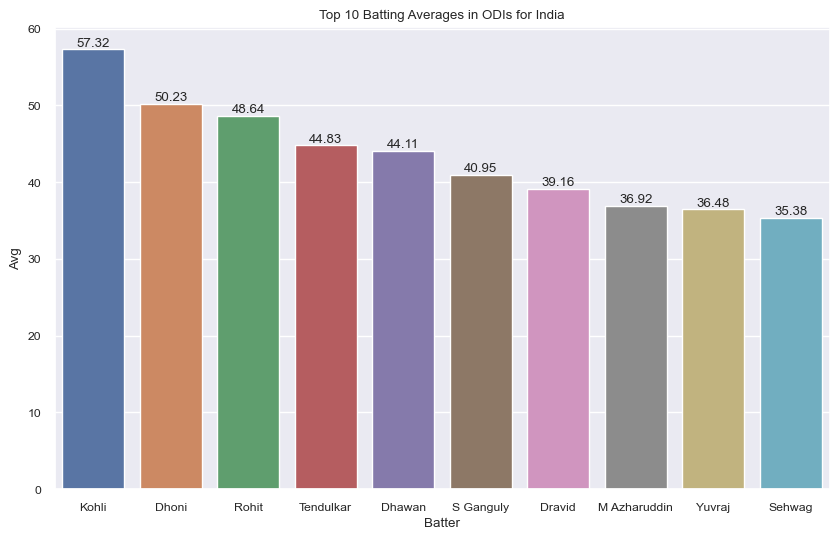

In [14]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_10, x = "Batter", y = "Avg", order=top_10.sort_values(by="Avg", ascending=False).Batter)
ax.set_title("Top 10 Batting Averages in ODIs for India")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

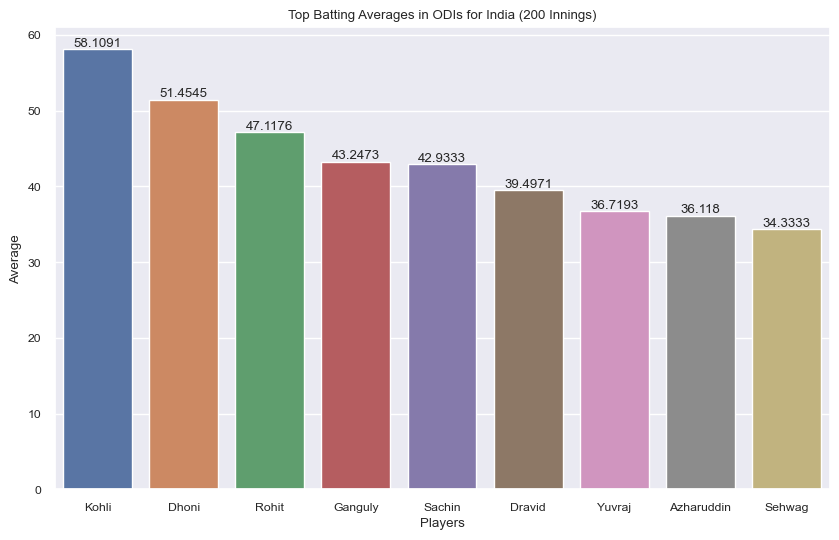

In [15]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 0.8)
ax = sns.barplot(data=only_200_df, x = "Name", y = "Average", order=only_200_df.sort_values(by="Average", ascending=False).Name)
ax.set_xlabel("Players")
ax.set_title("Top Batting Averages in ODIs for India (200 Innings)")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

From the Averages we can see that overall, Sachin ranks fourth on averages and fifth when looking at the first 200 innings. However, there are some interesting points to keep in mind:

* Tendulkar's average increased post-200 innings
* Tendulkar played another 252 innings, and increased the average slightly

Next. we will see how these averages breakdown when you factor in what position he played

In [16]:
only_200_df.sort_values(by="Average", ascending=False)

,Name,Runs,Average,Not Out,Innings
1,Kohli,9588,58.109091,35,200
4,Dhoni,7358,51.454545,57,200
5,Rohit,8010,47.117647,30,200
2,Ganguly,8044,43.247312,14,200
0,Sachin,7728,42.933333,20,200
3,Dravid,6912,39.497143,25,200
7,Yuvraj,6279,36.719298,29,200
6,Azharuddin,5815,36.118012,39,200
8,Sehwag,6592,34.333333,8,200


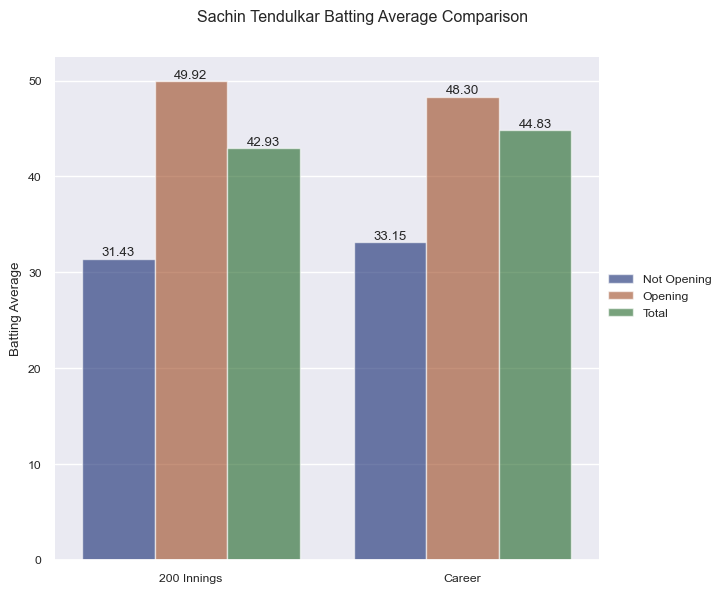

In [17]:
# Create bar plot comparing Tendulkar's Average as Opener versus when he is not 
# Two groups of three barplots (Not Opening Average, Opening Average, Total Average)
# First group is 200 Innings and the second is his career



# Career Stats
sachin_career = {}
sachin_career_opening_avg = get_career_average_list(sachin[(sachin["Pos"] == "1") | (sachin["Pos"] == "2")])
sachin_career_not_opening_avg = get_career_average_list(sachin[(sachin["Pos"] != "1") & (sachin["Pos"] != "2")])
sachin_career_avg = get_career_average_list(sachin)

# Only 200 Innings

sachin_200_opening_avg = get_career_average_list(sachin_200[(sachin_200["Pos"] == "1") | (sachin_200["Pos"] == "2")])
sachin_200_not_opening_avg = get_career_average_list(sachin_200[(sachin_200["Pos"] != "1") & (sachin_200["Pos"] != "2")])
sachin_200_avg = get_career_average_list(sachin_200)


sachin_averages_dict = {"Label" : ["200 Innings", "200 Innings", "200 Innings", "Career", "Career", "Career"],
                        "Averages" : [sachin_200_not_opening_avg[-1], sachin_200_opening_avg[-1], sachin_200_avg[-1], sachin_career_not_opening_avg[-1], sachin_career_opening_avg[-1], sachin_career_avg[-1]],
                        "Position": ["Not Opening", "Opening", "Total", "Not Opening", "Opening", "Total"]}

sachin_averages_df = pd.DataFrame.from_dict(sachin_averages_dict)

g = sns.catplot(data=sachin_averages_df, kind="bar", x = "Label", y = "Averages", hue="Position", palette="dark", alpha = 0.6, height=6)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height():.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
g.despine(left=True)
g.set_axis_labels("", "Batting Average")
g.legend.set_title("")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Sachin Tendulkar Batting Average Comparison")

# Create Pie Chat Differentiating Number of Innings Played by Position
num_innings_200 = [len(sachin_200_not_opening_avg), len(sachin_200_opening_avg)]
num_innings_career = [len(sachin_career_not_opening_avg), len(sachin_career_opening_avg)]
labels = ["Not Opening", "Opening"]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=num_innings_career, name="Career Innings"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=num_innings_200, name="200 Innings"), 1, 1)
fig.update_traces(hole = 0.6, hoverinfo='label+percent', textinfo='value', textfont_size=20)

fig.update_layout(
    title_text="Breakdown of Tendulkar's Innings by Position",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='200 Innings', x=0.165, y=0.5, font_size=20, showarrow=False),
                 dict(text='Career', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()



Next would be to map the averages over the course of a career to get a view of the consistency of Tendulkar considering the number of innings he ended up playing

In [18]:
# Generate plot of everyone average over the course of their career
def generate_averages_plot(data):
    players = data["Name"].tolist()
    urls = data["URL"].tolist()

    fig = go.Figure()

    for player, url in zip(players, urls):
        df = get_innings_dataframe(url)
        averages = get_career_average_list(df)
        x = np.arange(1, len(averages)+1)
        fig.add_trace(go.Scatter(x=x, y=averages, name=player, mode="lines"))
    
    fig.update_layout(autosize=False,
                      width=1800,
                      height=1000,
                      title = "Batting Average Across Careers (Min: 200 Innings)",
                      xaxis_title = "Number of Innings",
                      yaxis_title = "Batting Average")
    fig.show()

In [19]:
# Get the plot of the career averages of the top players who have played at least 200 innings
generate_averages_plot(data=links_df)

The crucial aspect we see with Tendulkar is that his average is very steady even though he played over 450 innings. This shows a huge level of consistency across decades. Among those whose careers have finished, it would be difficult to tell how their averages would have compared to Tendulkar's as many different aspects have to be taken into account (Bowlers, Age, Fitness, Form, etc.)

In [20]:
# Get the plot of the averages over the course of a timeline (Timeline of Sachin's career and have others come in), which will extend beyond his career to incorporate active players
def generate_averages_timeline(data):
    players = data["Name"].tolist()
    urls = data["URL"].tolist()

    fig = go.Figure()
    
    for player, url in zip(players, urls):
        df = get_innings_dataframe(url)
        averages = get_career_average_list(df)
        fig.add_trace(go.Scatter(x=df["Start Date"], y = averages, name=player, mode="lines"))
        fig.update_layout(autosize=False,
                      width=1800,
                      height=1000,
                      title = "Batting Average Across Career Timeline (Min: 200 Innings)",
                      xaxis_title = "Date",
                      yaxis_title = "Batting Average")
    fig.show()

In [21]:
generate_averages_timeline(links_df)

Note: As of May 31, 2023 only Virat Kohli and Rohit Sharma are still actively playing ODI Cricket

In [22]:
# TODO: Add a vertical line to show Sachin's career

#### 1.3 Percentage of Runs 

In [23]:
example_url = "https://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;template=results;type=batting;view=innings"
foo = get_innings_dataframe(example_url)
foo_url = foo.iloc[1]["Match URL"]
print(foo.iloc[0]["Match URL"])
foo_match = pd.read_html(foo.iloc[-2]["Match URL"])

https://stats.espncricinfo.com/ci/engine/match/64346.html


In [24]:
import requests
from bs4 import BeautifulSoup

In [25]:
def get_match_result(match_url, country):
    match_html = requests.get(match_url)
    s = BeautifulSoup(match_html.content, "html.parser")
    results = s.find_all("p", class_= "ds-text-tight-m ds-font-regular ds-truncate ds-text-typo")
    match_result = results[0].text
    if country in match_result:
        return "W"
    else:
        return "L"

In [26]:
def get_run_percentage(inning, match_url, runs):
    for attempt in range(30):
        try:
            scorecard = pd.read_html(match_url)
            break
        except http.client.IncompleteRead:
            print(f'Attempt {attempt} timed out! trying again in 10 seconds.')
            time.sleep(10)
    if inning == "1":
        scorecard = scorecard[0]
    else:
        scorecard = scorecard[2]
    final_score = scorecard[scorecard["BATTING"] == "TOTAL"]["R"].iloc[0].split("/")
    total_score = final_score[0]
    if len(final_score) == 1:
        total_wicket = "10"
    else:
        total_wicket = final_score[1]
    percentage = (int(runs)/int(total_score))*100
    # print(match_url, final_score, percentage)
    return total_score, total_wicket, percentage

In [27]:
def update_additional_columns(career_data):
    country = "India" # For now India but will later incorporate other countries
    career_data = career_data.copy()
    career_data = parse_not_out(career_data)
    total_wickets = []
    total_scores = []
    percentages = []
    match_results = []
    innings = career_data["Inns"].tolist()
    match_urls = career_data["Match URL"].tolist()
    runs_scored = career_data["Runs"].tolist()
    for inning, match_url, runs in zip(innings, match_urls, runs_scored):
        total_score, total_wicket, percentage = get_run_percentage(inning, match_url, runs)
        match_result = get_match_result(match_url, country)

        # Get the totals of the column values
        total_scores.append(int(total_score))
        total_wickets.append(int(total_wicket))
        percentages.append(percentage)
        match_results.append(match_result)

    # Create the new columns
    career_data["Team Total"] = total_scores
    career_data["Wickets Fallen"] = total_wickets
    career_data["Percentage Scored"] = percentages
    career_data["Match Result"] = match_results

    return career_data

In [28]:
def create_all_data_csv(data):
    """Takes in the DataFrame with the Names and their Respective Player Links and Creates a Full csv of their batting"""
    players = data["Name"].tolist()[1:]
    urls = data["URL"].tolist()[1:]

    for player, url in zip(players, urls):
        career_data = get_innings_dataframe(url)
        career_data = update_additional_columns(career_data)
        
        file_name = f"{player.upper()}.csv"
        career_data.to_csv(file_name, index = False)
        print(f"Done with {player}")

In [29]:
# Graph of the occurences of player getting more than 40 % of the team total
def plot_percentages(percentage_runs_threshold):
    plt.figure(figsize=(10,6))
    num_percentage_runs = []
    num_percentage_runs_200 = []
    players = []
    for data in os.scandir("player_data"):
        player = Path(data).stem
        players.append(player)
        career_data = pd.read_csv(data)
        career_data_200 = career_data.iloc[:200]
        percentage_runs = career_data[career_data["Percentage Scored"] > percentage_runs_threshold]
        percentage_runs_200 = career_data_200[career_data_200["Percentage Scored"] > percentage_runs_threshold]
        num_percentage_run = len(percentage_runs.index)
        num_percentage_run_200 = len(percentage_runs_200.index)
        num_percentage_runs.append(num_percentage_run)
        num_percentage_runs_200.append(num_percentage_run_200)
    player_percentage_dict = {"Name": players, "Number of Percentage Scored" : num_percentage_runs, "Number of Percentage Scored 200 Innings" : num_percentage_runs_200}
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    sns.barplot(ax = axes[0], data = player_percentage_dict, x = "Name", y = "Number of Percentage Scored 200 Innings")
    sns.barplot(ax = axes[1], data = player_percentage_dict, x = "Name", y = "Number of Percentage Scored")
    for i in axes[0].containers:
        axes[0].bar_label(i,)
    for i in axes[1].containers:
        axes[1].bar_label(i,)
    axes[0].set_title(f"Number of Times Top Indian Batsmen Scored More than {percentage_runs_threshold} Percent of Team Total in First 200 Innings")
    axes[1].set_title(f"Number of Times Top Indian Batsmen Scored More than {percentage_runs_threshold} Percent of Team Total in Career (Min: 200 Innings)")


<Figure size 1000x600 with 0 Axes>

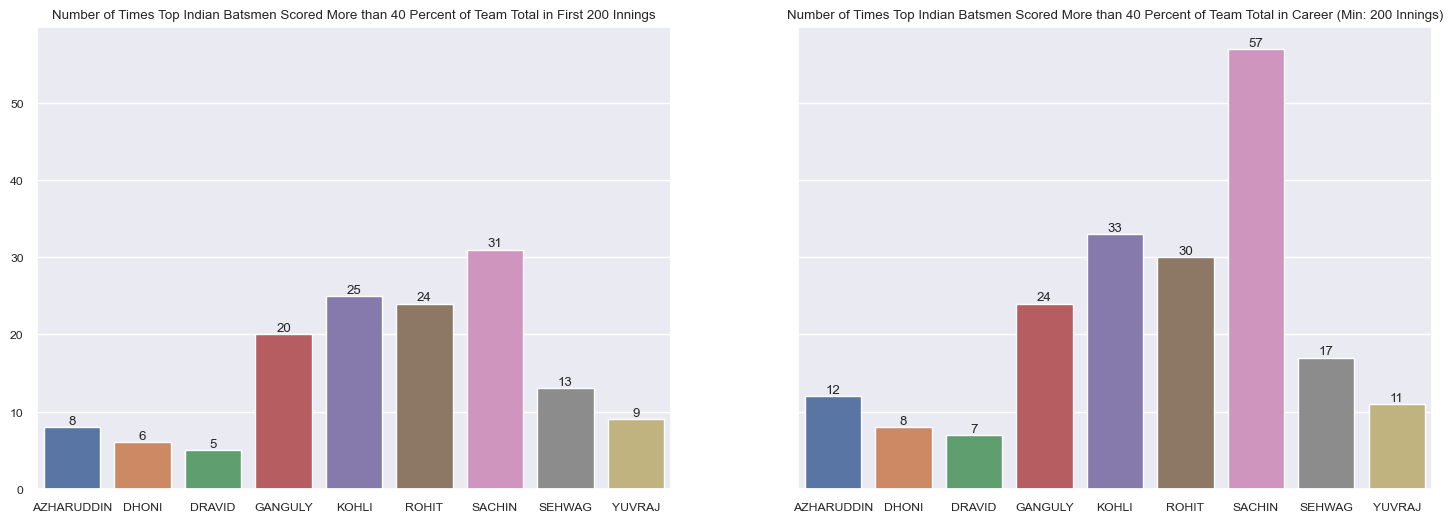

<Figure size 1000x600 with 0 Axes>

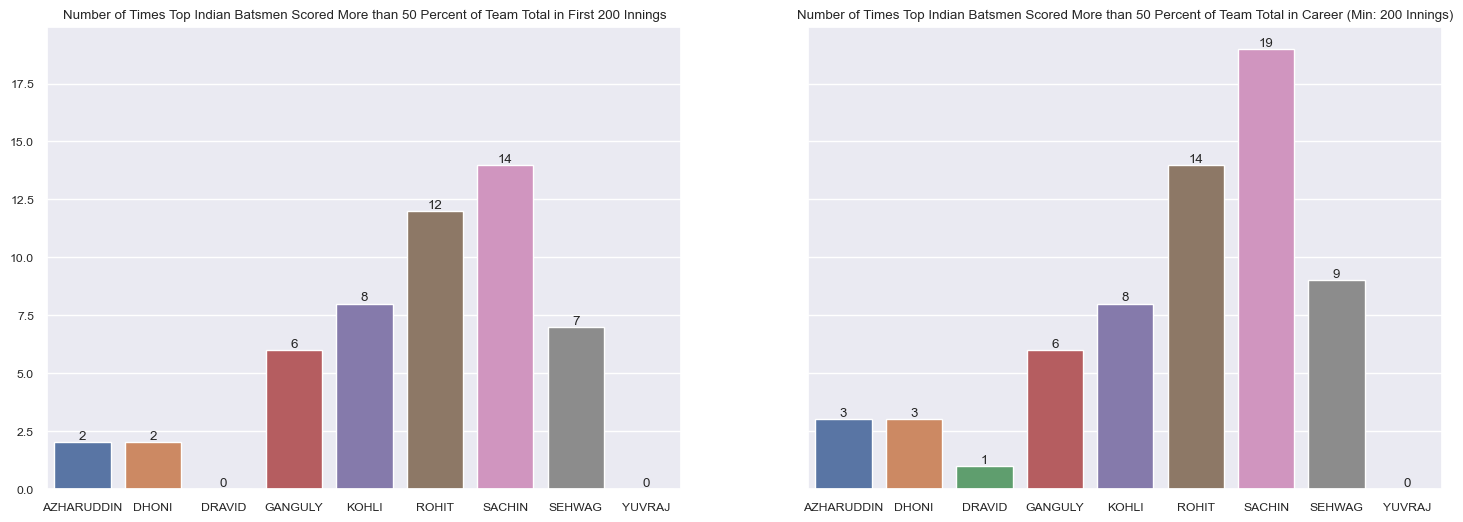

In [30]:
plot_percentages(40)
plot_percentages(50)

Finally, in the graphs above we start to see where Sachin begins to pull ahead of his peers. As we see, Sachin tops the charts with number of times he scored more than 40 and 50 percent of the teams totals

However, this does not tell the whole story as there is an issue that needs to be addressed:
 - Since Sachin, Rohit, Kohli, Ganguly, and Sehwag are predominantly top order batsmen, it makes sense that they would be scoring most of the runs on the team or at least have the most number of chances as they would be facing the most number of deliveries
 - We will address this by seeing for each match in which they scored more than those percentages of the team total, what was the difference between their score and the second highest score
 - The greater the difference it will clearly show whether they had much support or not
 - Furthermore, we can filter down further to see how many times this occurred without another batsmen making a half century

#### 1.3a Percentage Runs Based on Other Batsmen Performance

The performance metric we will be using is:

Performance Metric = (Runs Scored * Strike Rate * Partnership Score * Not-Out Bonus * Contextual Factor) / (Total Wickets Fallen * Innings Duration * Average Innings Duration)

Contextual Factor = 1 + (Number of Wickets Fallen / Runs Scored by the Team)

Notes:
* For Not-Out Bonus, if the batsmen remains not out at the end of the innings, then this will be 1.1 or 1.2, else 1
* For contextual factor, it is number and runs before the batsman in question comes out.

In [31]:
# TODO: Evaluate performance of players using a metric
foo_match[0].drop(foo_match[0].columns[-2:], axis = 1).dropna()

,BATTING,Unnamed: 1,R,B,M,4s,6s,SR
0,Gautam Gambhir,b Shafiul Islam,11,16,27,1,0,68.75
2,Sachin Tendulkar,c †Mushfiqur Rahim b Mashrafe Mortaza,114,147,205,12,1,77.55
4,Virat Kohli,b Abdur Razzak,66,82,126,5,0,80.48
6,Suresh Raina,c Tamim Iqbal b Mashrafe Mortaza,51,38,48,5,2,134.21
8,MS Dhoni (c)†,not out,21,11,20,2,0,190.90
9,Rohit Sharma,run out (Nasir Hossain),4,6,9,0,0,66.66
11,Ravindra Jadeja,not out,4,2,8,0,0,200.00
14,"Did not bat: Irfan Pathan, Ravichandran Ashwin...","Did not bat: Irfan Pathan, Ravichandran Ashwin...","Did not bat: Irfan Pathan, Ravichandran Ashwin...","Did not bat: Irfan Pathan, Ravichandran Ashwin...","Did not bat: Irfan Pathan, Ravichandran Ashwin...","Did not bat: Irfan Pathan, Ravichandran Ashwin...","Did not bat: Irfan Pathan, Ravichandran Ashwin...","Did not bat: Irfan Pathan, Ravichandran Ashwin..."
15,"Fall of wickets: 1-25 (Gautam Gambhir, 5.5 ov)...","Fall of wickets: 1-25 (Gautam Gambhir, 5.5 ov)...","Fall of wickets: 1-25 (Gautam Gambhir, 5.5 ov)...","Fall of wickets: 1-25 (Gautam Gambhir, 5.5 ov)...","Fall of wickets: 1-25 (Gautam Gambhir, 5.5 ov)...","Fall of wickets: 1-25 (Gautam Gambhir, 5.5 ov)...","Fall of wickets: 1-25 (Gautam Gambhir, 5.5 ov)...","Fall of wickets: 1-25 (Gautam Gambhir, 5.5 ov)..."


#### 1.4 Ratio of Centuries to Wins

Text(0.5, 1.0, 'Ratio of Centuries in Won Matches in Career (Min. 200 Innings)')

<Figure size 1000x600 with 0 Axes>

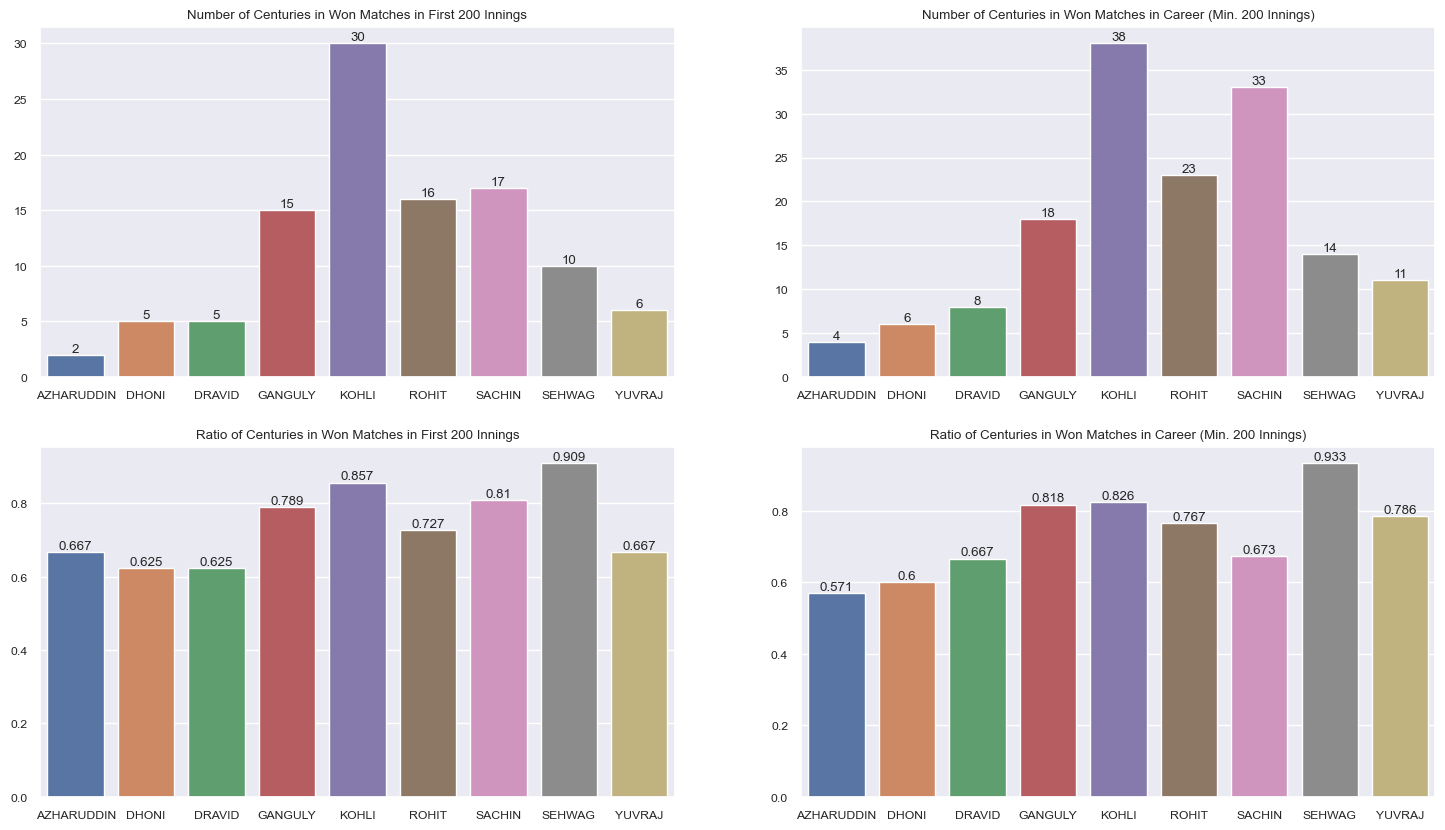

In [32]:
# Four subplots of number of centuries to wins followed by ratio of centuries to wins (Including only 200 Innings)

plt.figure(figsize=(10,6))
num_centuries = []
num_centuries_200 = []
num_century_wins = []
num_century_wins_200 = []
ratio_century_wins = []
ratio_century_wins_200 = []
players = []
for data in os.scandir("player_data"):
    player = Path(data).stem
    players.append(player)
    career_data = pd.read_csv(data)
    num_matches = len(career_data.index)

    career_data_200 = career_data.iloc[:200]

    # Filter out data by centuries and get number of wins
    centuries_df = career_data[career_data["Runs"] >= 100]
    num_century = len(centuries_df.index)
    num_century_win = len(centuries_df[centuries_df["Match Result"] == "W"].index)
    
    
    ratio_century_win = num_century_win/num_century

    # Repeat process for 200 Innings
    centuries_df_200 = career_data_200[career_data_200["Runs"] >= 100]
    num_century_200 = len(centuries_df_200.index)
    num_century_win_200 = len(centuries_df_200[centuries_df_200["Match Result"] == "W"].index)

    ratio_century_win_200 = num_century_win_200/num_century_200

    # Add to the list
    num_centuries.append(num_century)
    num_centuries_200.append(num_century_200)

    num_century_wins.append(num_century_win)
    num_century_wins_200.append(num_century_win_200)

    ratio_century_wins.append(round(ratio_century_win,3))
    ratio_century_wins_200.append(round(ratio_century_win_200,3))

player_wins_dict = {"Name": players, "Number of Centuries to Wins" : num_century_wins, "Number of Centuries to Wins 200 Innings" : num_century_wins_200,
                    "Number of Centuries" : num_centuries, "Number of Centuries in 200 Innings" : num_centuries_200,
                    "Ratio of Centuries to Wins" : ratio_century_wins, "Ratio of Centuries to Wins 200 Innings" : ratio_century_wins_200}
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.barplot(ax = axes[0,0], data = player_wins_dict, x = "Name", y = "Number of Centuries to Wins 200 Innings")
# sns.barplot(ax = axes[0,0], data = player_wins_dict, x = "Name", y = "Number of Centuries in 200 Innings")
sns.barplot(ax = axes[0,1], data = player_wins_dict, x = "Name", y = "Number of Centuries to Wins")
# sns.barplot(ax = axes[0,1], data = player_wins_dict, x = "Name", y = "Number of Centuries")
sns.barplot(ax = axes[1,0], data = player_wins_dict, x = "Name", y = "Ratio of Centuries to Wins 200 Innings")
sns.barplot(ax = axes[1,1], data = player_wins_dict, x = "Name", y = "Ratio of Centuries to Wins")

for i in axes[0,0].containers:
        axes[0,0].bar_label(i,)
for i in axes[0,1].containers:
    axes[0,1].bar_label(i,)
for i in axes[1,0].containers:
        axes[1,0].bar_label(i,)
for i in axes[1,1].containers:
    axes[1,1].bar_label(i,)

axes[0,0].set_title("Number of Centuries in Won Matches in First 200 Innings")
axes[0,1].set_title("Number of Centuries in Won Matches in Career (Min. 200 Innings)")
axes[1,0].set_title("Ratio of Centuries in Won Matches in First 200 Innings")
axes[1,1].set_title("Ratio of Centuries in Won Matches in Career (Min. 200 Innings)")

Need to write summary of above graph

##### 1.4a Percentage of Runs to Wins/Losses

In [33]:
def plot_percentage_wins(percentage_runs_threshold):
    plt.figure(figsize=(10,6))
    num_percentage_wins = []
    num_percentage_wins_200 = []
    players = []
    for data in os.scandir("player_data"):
        player = Path(data).stem
        players.append(player)
        career_data = pd.read_csv(data)
        career_data_200 = career_data.iloc[:200]
        percentage_runs = career_data[career_data["Percentage Scored"] > percentage_runs_threshold]
        percentage_runs_200 = career_data_200[career_data_200["Percentage Scored"] > percentage_runs_threshold]
        percentage_wins = percentage_runs[percentage_runs["Match Result"] == "W"]
        percentage_wins_200 = percentage_runs_200[percentage_runs_200["Match Result"] == "W"]
        num_percentage_win = len(percentage_wins.index)
        num_percentage_win_200 = len(percentage_wins_200.index)
        num_percentage_wins.append(num_percentage_win)
        num_percentage_wins_200.append(num_percentage_win_200)
    player_percentage_dict = {"Name": players, "Number of Wins After Percentage Scored" : num_percentage_wins, "Number of Wins After Percentage Scored 200 Innings" : num_percentage_wins_200}
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    sns.barplot(ax = axes[0], data = player_percentage_dict, x = "Name", y = "Number of Wins After Percentage Scored 200 Innings")
    sns.barplot(ax = axes[1], data = player_percentage_dict, x = "Name", y = "Number of Wins After Percentage Scored")
    for i in axes[0].containers:
        axes[0].bar_label(i,)
    for i in axes[1].containers:
        axes[1].bar_label(i,)
    axes[0].set_title(f"Number of Wins After Top Indian Batsmen Scored More than {percentage_runs_threshold} Percent of Team Total in First 200 Innings")
    axes[1].set_title(f"Number of Wins After Top Indian Batsmen Scored More than {percentage_runs_threshold} Percent of Team Total in Career (Min: 200 Innings)")

<Figure size 1000x600 with 0 Axes>

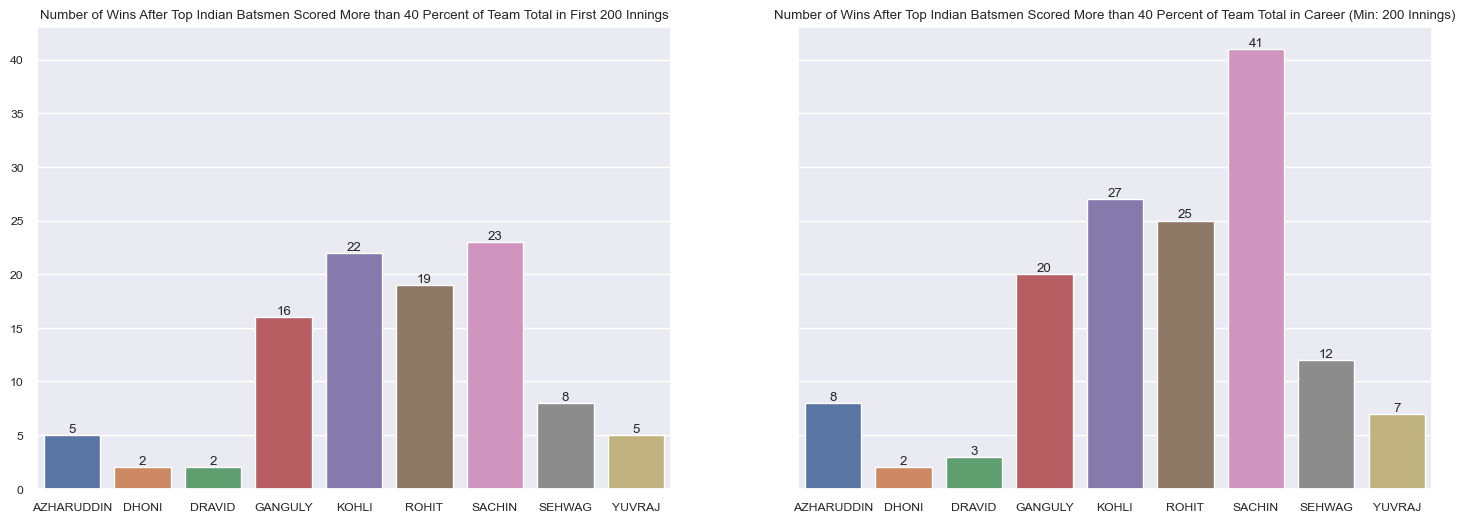

<Figure size 1000x600 with 0 Axes>

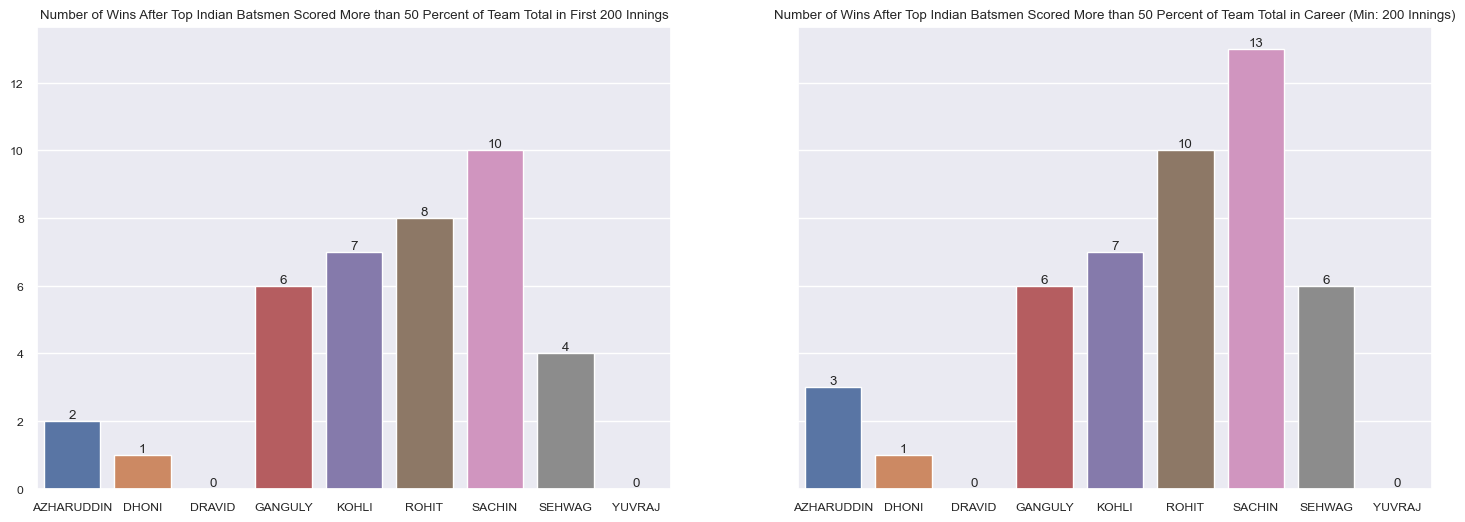

In [34]:
plot_percentage_wins(40)
plot_percentage_wins(50)

Put something to describe the bar charts above

In [35]:
# Plot percentage loss even when batsmen do well
def plot_percentage_loss(percentage_runs_threshold):
    plt.figure(figsize=(10,6))
    num_percentage_loss = []
    num_percentage_loss_200 = []
    players = []
    for data in os.scandir("player_data"):
        player = Path(data).stem
        players.append(player)
        career_data = pd.read_csv(data)
        career_data_200 = career_data.iloc[:200]
        percentage_runs = career_data[career_data["Percentage Scored"] > percentage_runs_threshold]
        percentage_runs_200 = career_data_200[career_data_200["Percentage Scored"] > percentage_runs_threshold]
        percentage_loss = percentage_runs[percentage_runs["Match Result"] == "L"]
        percentage_loss_200 = percentage_runs_200[percentage_runs_200["Match Result"] == "L"]
        num_percentage_defeat = len(percentage_loss.index)
        num_percentage_defeat_200 = len(percentage_loss_200.index)
        num_percentage_loss.append(num_percentage_defeat)
        num_percentage_loss_200.append(num_percentage_defeat_200)
    player_percentage_dict = {"Name": players, "Number of Losses After Scoring More than Percentage" : num_percentage_loss, "Number of Losses After Scoring More than Percentage 200 Innings" : num_percentage_loss_200}
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    sns.barplot(ax = axes[0], data = player_percentage_dict, x = "Name", y = "Number of Losses After Scoring More than Percentage 200 Innings")
    sns.barplot(ax = axes[1], data = player_percentage_dict, x = "Name", y = "Number of Losses After Scoring More than Percentage")
    for i in axes[0].containers:
        axes[0].bar_label(i,)
    for i in axes[1].containers:
        axes[1].bar_label(i,)
    axes[0].set_title(f"Number of Losses After Top Indian Batsmen Scored More than {percentage_runs_threshold} Percent of Team Total in First 200 Innings")
    axes[1].set_title(f"Number of Losses After Top Indian Batsmen Scored More than {percentage_runs_threshold} Percent of Team Total in Career (Min: 200 Innings)")

<Figure size 1000x600 with 0 Axes>

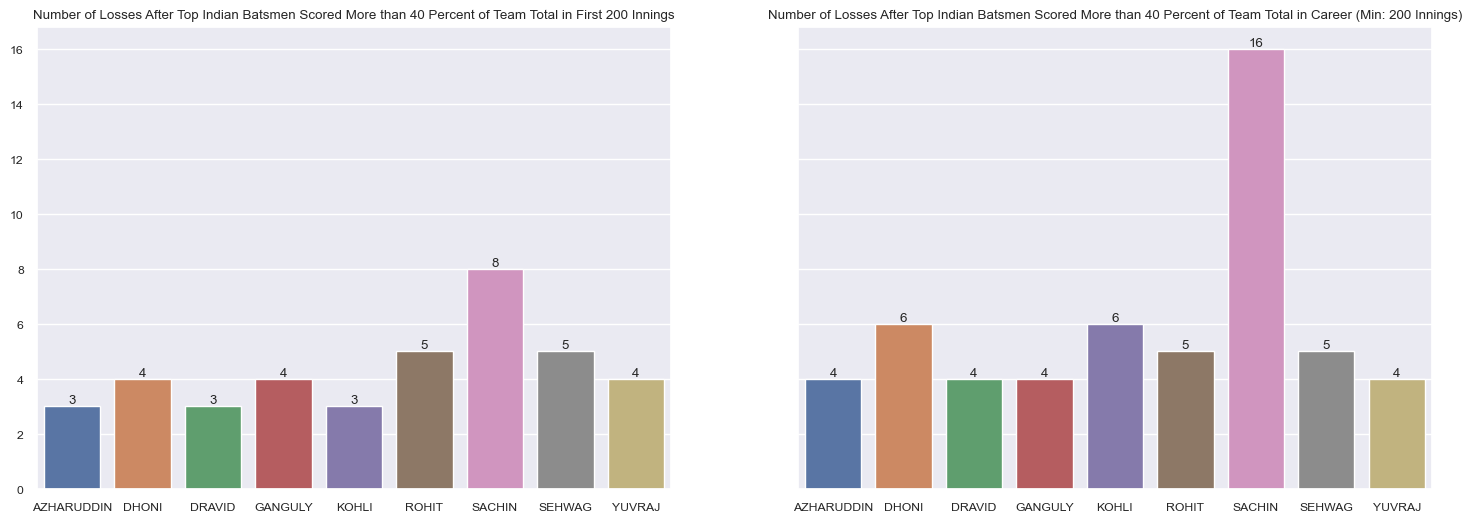

<Figure size 1000x600 with 0 Axes>

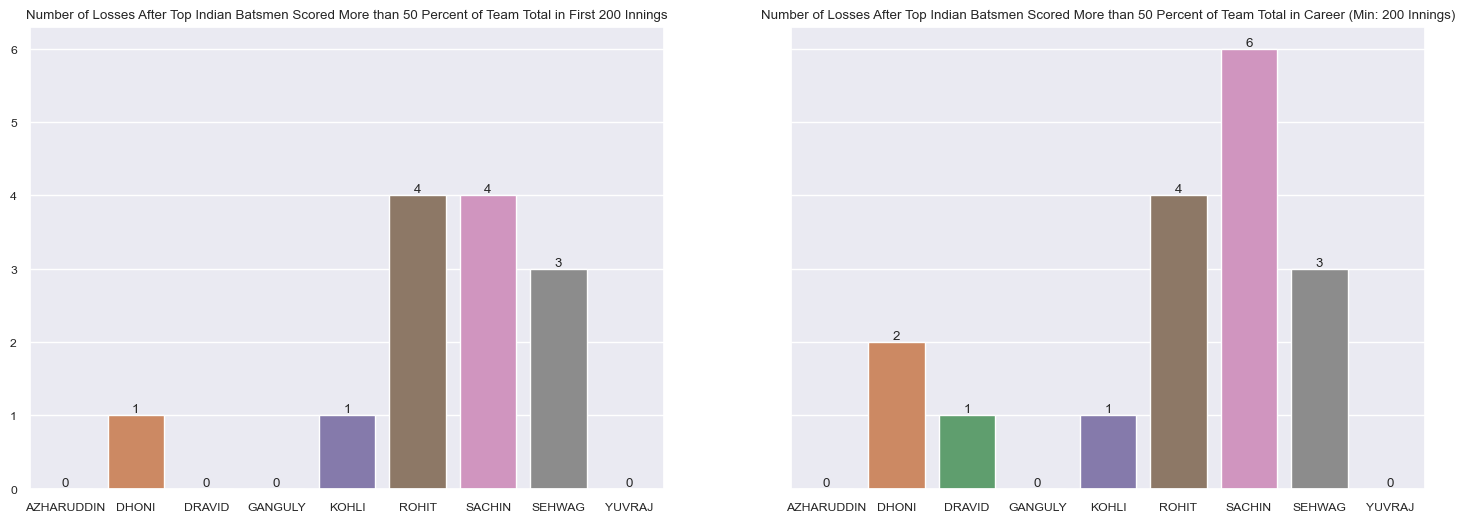

In [36]:
plot_percentage_loss(40)
plot_percentage_loss(50)

Write somethign about the above graph

#### 1.5 Value of Runs

Move some of the above graphs to here including percentage of runs and win/loss

#### 1.6 Phases of Career

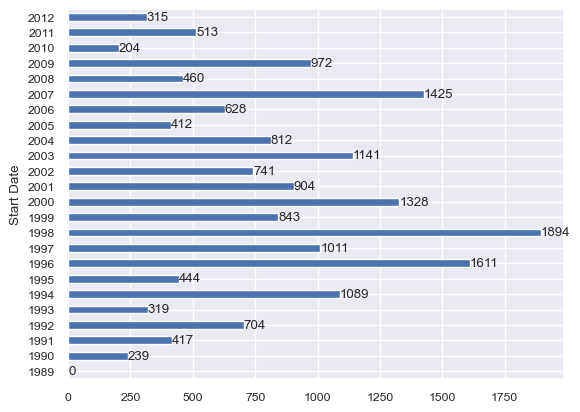

In [37]:
# Aggregate the number of runs by year
ax = sachin.groupby(sachin["Start Date"].dt.year)["Runs"].sum().plot(kind="barh")
for container in ax.containers:
    ax.bar_label(container)

From the plot above, we can split Tendulkar's career into four phases: 
1. 1989 - 1995, the beginning years and signs of greatness
2. 1996 - 2000, Sachin Tendulkar at his prime
3. 2001 - 2005, later years and the 2003 World Cup
4. 2006 - 2012, the final years

##### 1.6a Overall Statistics of Sachin Over Four Phases of Career

In [38]:
sachin_df = pd.read_csv("C:\\Users\\Sriram Kidambi\\OneDrive\\Documents\\Python\\Data Science Stuff\\cricket_project\\player_data\\SACHIN.csv")
sachin_df["Start Date"] = pd.to_datetime(sachin_df["Start Date"])

In [39]:
first_phase = sachin_df[(sachin_df["Start Date"].dt.year >=1989) & (sachin_df["Start Date"].dt.year <=1995)]
second_phase = sachin_df[(sachin_df["Start Date"].dt.year >=1996) & (sachin_df["Start Date"].dt.year <=2000)]
third_phase = sachin_df[(sachin_df["Start Date"].dt.year >=2001) & (sachin_df["Start Date"].dt.year <=2005)]
fourth_phase = sachin_df[(sachin_df["Start Date"].dt.year >=2006) & (sachin_df["Start Date"].dt.year <=2012)]

Text(0.5, 0.98, 'Sachin Tendulkar over Phases in Career')

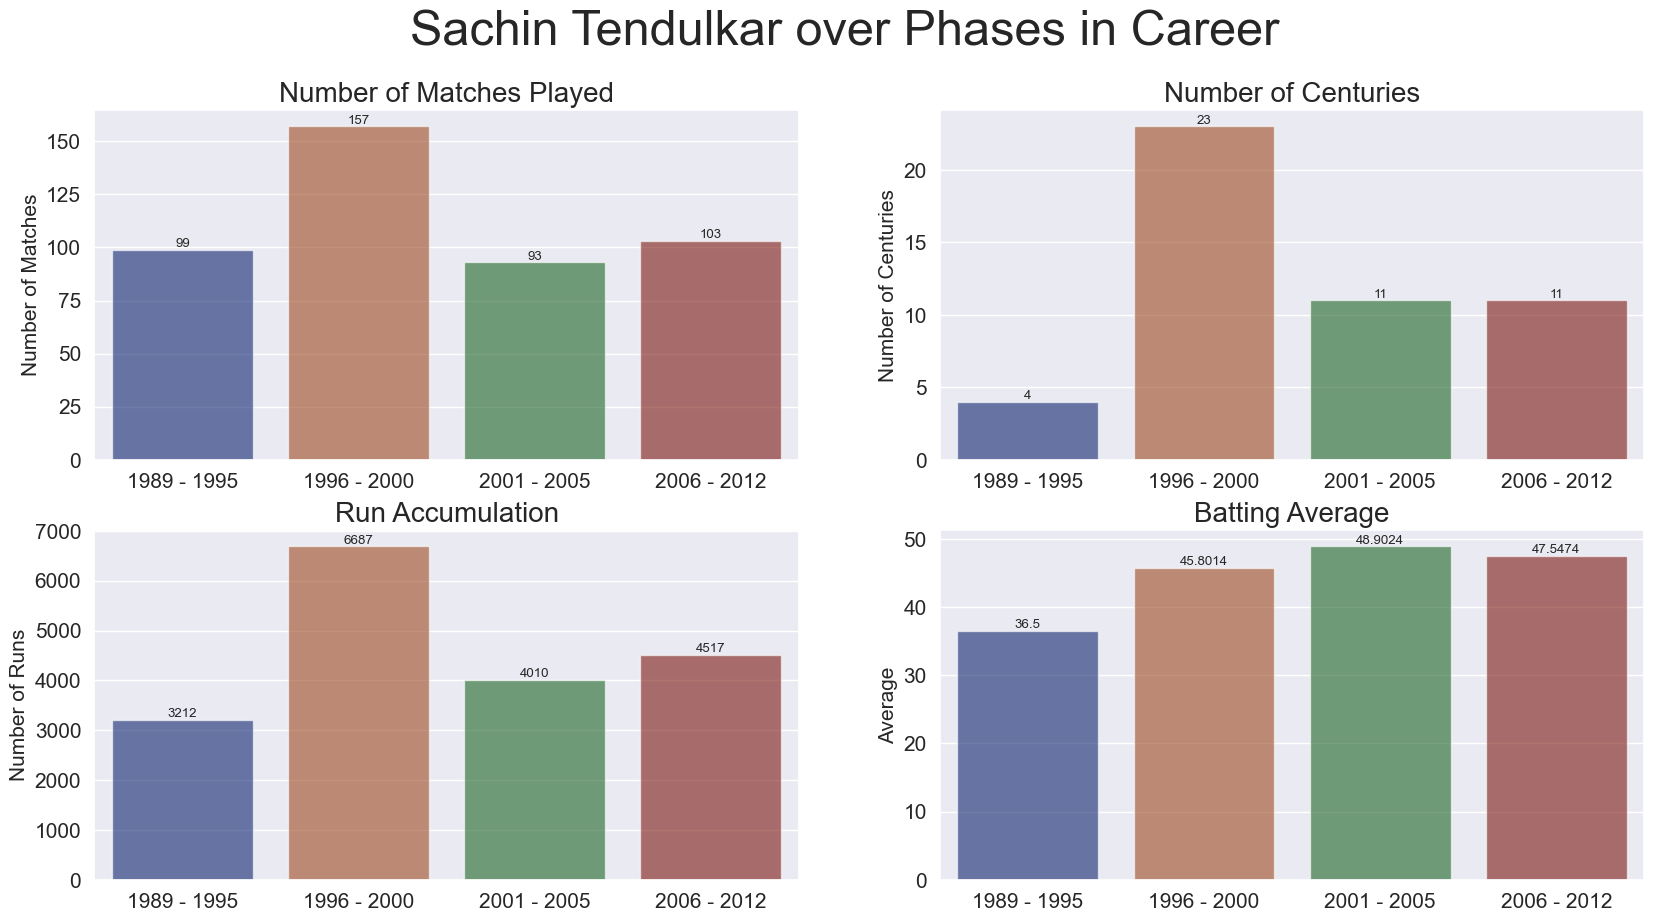

In [40]:
# Create a plot for the runs scored in these four periods
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
# fig.subplots_adjust(hspace=2, wspace=2)
period = ["1989 - 1995", "1996 - 2000", "2001 - 2005", "2006 - 2012"]

# Plot of the number of matches played during each period
num_matches_dict = {}

first_num_matches = len(first_phase.index)
second_num_matches = len(second_phase.index)
third_num_matches = len(third_phase.index)
fourth_num_matches = len(fourth_phase.index)

num_matches = [first_num_matches, second_num_matches, third_num_matches, fourth_num_matches]
num_matches_dict["Phases"] = period
num_matches_dict["Num Matches"] = num_matches

num_matches_df = pd.DataFrame.from_dict(num_matches_dict)

sns.barplot(data=num_matches_df, x = "Phases", y = "Num Matches", palette="dark", alpha = 0.6, ax=axes[0,0])
for container in axes[0,0].containers:
    axes[0,0].bar_label(container)
axes[0,0].set_title("Number of Matches Played", fontsize = 20)
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Number of Matches", fontsize = 15)
axes[0,0].tick_params(axis = "x", labelsize = 15)
axes[0,0].tick_params(axis = "y", labelsize = 15)

# Plot number of centuries in each period
num_centuries_dict = {}

first_num_centuries = len(first_phase[first_phase["Runs"] >= 100].index)
second_num_centuries = len(second_phase[second_phase["Runs"] >= 100].index)
third_num_centuries = len(third_phase[third_phase["Runs"] >= 100].index)
fourth_num_centuries = len(fourth_phase[fourth_phase["Runs"] >= 100].index)

num_centuries = [first_num_centuries, second_num_centuries, third_num_centuries, fourth_num_centuries]

num_centuries_dict["Phases"] = period
num_centuries_dict["Centuries"] = num_centuries

num_centuries_df = pd.DataFrame.from_dict(num_centuries_dict)

sns.barplot(data=num_centuries_df, x = "Phases", y = "Centuries", palette="dark", alpha = 0.6, ax=axes[0,1])
for container in axes[0,1].containers:
    axes[0,1].bar_label(container)
axes[0,1].set_title("Number of Centuries", fontsize = 20)
axes[0,1].set_xlabel("")
axes[0,1].tick_params(axis = "x", labelsize = 15)
axes[0,1].tick_params(axis = "y", labelsize = 15)
axes[0,1].set_ylabel("Number of Centuries", fontsize = 15)

# Plot of Runs over the different phases
runs_phases_dict = {}


first_runs = first_phase["Runs"].sum()
second_runs = second_phase["Runs"].sum()
third_runs = third_phase["Runs"].sum()
fourth_runs = fourth_phase["Runs"].sum()
runs = [first_runs, second_runs, third_runs, fourth_runs]

runs_phases_dict["Phases"] = period
runs_phases_dict["Runs"] = runs

runs_phases_df = pd.DataFrame.from_dict(runs_phases_dict)

sns.barplot(data=runs_phases_df, x = "Phases", y = "Runs", palette="dark", alpha = 0.6, ax=axes[1,0])
for container in axes[1,0].containers:
    axes[1,0].bar_label(container)
axes[1,0].set_title("Run Accumulation", fontsize = 20)
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Number of Runs", fontsize = 15)
axes[1,0].tick_params(axis = "x", labelsize = 15)
axes[1,0].tick_params(axis = "y", labelsize = 15)

# Plot of average over the different phases
average_phases_dict = {}

first_average = get_career_average_list(first_phase)[-1]
second_average = get_career_average_list(second_phase)[-1]
third_average = get_career_average_list(third_phase)[-1]
fourth_average = get_career_average_list(fourth_phase)[-1]

averages = [first_average, second_average, third_average, fourth_average]

average_phases_dict["Phases"] = period
average_phases_dict["Averages"] = averages

average_phases_df = pd.DataFrame.from_dict(average_phases_dict)

sns.barplot(data=average_phases_df, x = "Phases", y = "Averages", palette="dark", alpha = 0.6, ax=axes[1,1])
for container in axes[1,1].containers:
    axes[1,1].bar_label(container)
axes[1,1].set_title("Batting Average", fontsize = 20)
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("Average", fontsize = 15)
axes[1,1].tick_params(axis = "x", labelsize = 15)
axes[1,1].tick_params(axis = "y", labelsize = 15)

plt.suptitle("Sachin Tendulkar over Phases in Career", fontsize = 35)


As we can see, between 1996 and 2000, Sachin was at his best and accumulated more than a third of his total career runs tally. Many consider this to be Sachin in his prime years and we will break this down to see why that is.

##### 1.6b. Run Percentages during Phases of Sachin's Career

Text(0.5, 0.98, 'Number of Times Sachin Scored More than 40 Percent of Team Total over Career')

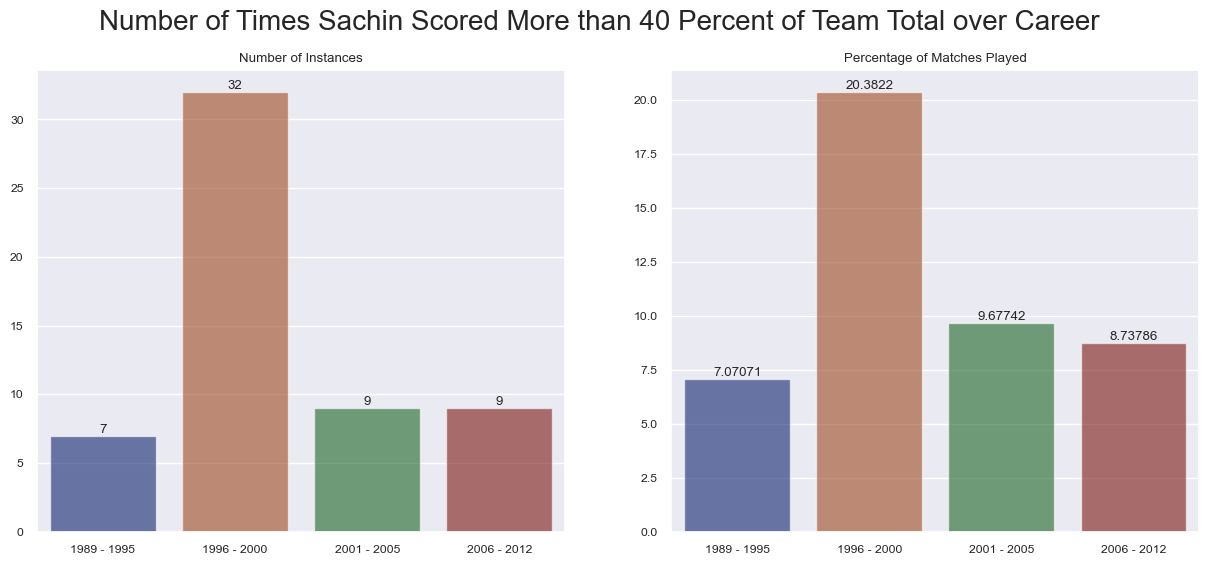

In [41]:
# Look at number of times Sachin scored more than 40 percent of the team total
fig, axes = plt.subplots(1, 2, figsize = (15,6))

phase_percentages_dict = {}

first_percentage_number = len(first_phase[first_phase["Percentage Scored"] >= 40].index)
first_percentage = first_percentage_number/len(first_phase.index)*100

second_percentage_number = len(second_phase[second_phase["Percentage Scored"] >= 40].index)
second_percentage = second_percentage_number/len(second_phase.index)*100

third_percentage_number = len(third_phase[third_phase["Percentage Scored"] >= 40].index)
third_percentage = third_percentage_number/len(third_phase.index)*100

fourth_percentage_number = len(fourth_phase[fourth_phase["Percentage Scored"] >= 40].index)
fourth_percentage = fourth_percentage_number/len(fourth_phase.index)*100

phase_percentages_dict["Phases"] = period
phase_percentages_dict["Run Percentage Number"] = [first_percentage_number, second_percentage_number, third_percentage_number, fourth_percentage_number]
phase_percentages_dict["Run Percentages"] = [first_percentage, second_percentage, third_percentage, fourth_percentage]

phase_percentages_df = pd.DataFrame.from_dict(phase_percentages_dict)

sns.barplot(data = phase_percentages_df, x = "Phases", y = "Run Percentage Number", palette="dark", alpha = 0.6, ax = axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_title("Number of Instances")
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.barplot(data = phase_percentages_df, x = "Phases", y = "Run Percentages", palette="dark", alpha = 0.6, ax = axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title("Percentage of Matches Played")
axes[1].set_ylabel("")
axes[1].set_xlabel("")

plt.suptitle("Number of Times Sachin Scored More than 40 Percent of Team Total over Career", fontsize = 20)

As we can clearly see, between 1996-2000, Sachin was absolutely at his peak. Once every 5 matches, he would contribute over 40% of his team's total. In just a 5 year span, he did this 5 more times than second place did in their career (so far, Virat Kohli) and that too in only 157 matches, whereas some other batsmen could not get even half of this over the course of their whole career. 

Text(0.5, 0.98, 'Number of Times Sachin Scored More than 50 Percent of Team Total over Career')

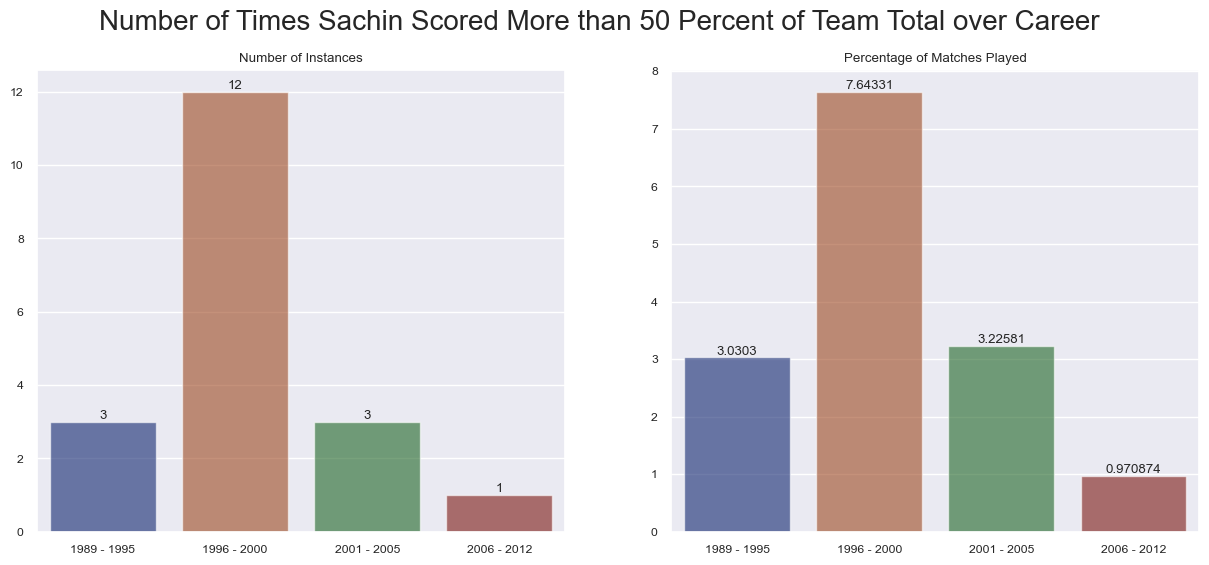

In [42]:
# Look at number of times Sachin scored more than 50 percent of the team total
fig, axes = plt.subplots(1, 2, figsize = (15,6))

phase_percentages_dict = {}

first_percentage_number = len(first_phase[first_phase["Percentage Scored"] >= 50].index)
first_percentage = first_percentage_number/len(first_phase.index)*100

second_percentage_number = len(second_phase[second_phase["Percentage Scored"] >= 50].index)
second_percentage = second_percentage_number/len(second_phase.index)*100

third_percentage_number = len(third_phase[third_phase["Percentage Scored"] >= 50].index)
third_percentage = third_percentage_number/len(third_phase.index)*100

fourth_percentage_number = len(fourth_phase[fourth_phase["Percentage Scored"] >= 50].index)
fourth_percentage = fourth_percentage_number/len(fourth_phase.index)*100

phase_percentages_dict["Phases"] = period
phase_percentages_dict["Run Percentage Number"] = [first_percentage_number, second_percentage_number, third_percentage_number, fourth_percentage_number]
phase_percentages_dict["Run Percentages"] = [first_percentage, second_percentage, third_percentage, fourth_percentage]

phase_percentages_df = pd.DataFrame.from_dict(phase_percentages_dict)

sns.barplot(data = phase_percentages_df, x = "Phases", y = "Run Percentage Number", palette="dark", alpha = 0.6, ax = axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_title("Number of Instances")
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.barplot(data = phase_percentages_df, x = "Phases", y = "Run Percentages", palette="dark", alpha = 0.6, ax = axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title("Percentage of Matches Played")
axes[1].set_ylabel("")
axes[1].set_xlabel("")

plt.suptitle("Number of Times Sachin Scored More than 50 Percent of Team Total over Career", fontsize = 20)

We see the same thing when Sachin scores at least 50 percent of the team total. He did it 12 times during the 1996 - 2000 period. To put that into context, that itself is more than almost anyone else in their entire career (Rohit Sharma has done it 14 times so far).

Overall, we see so far from percentage scored of the team total that Sachin was a completely different player. Just in this period alone he has achieved feats that many others could not do in the entire career.

##### 1.6c. Win Percentages Over Phases of Sachin's Career

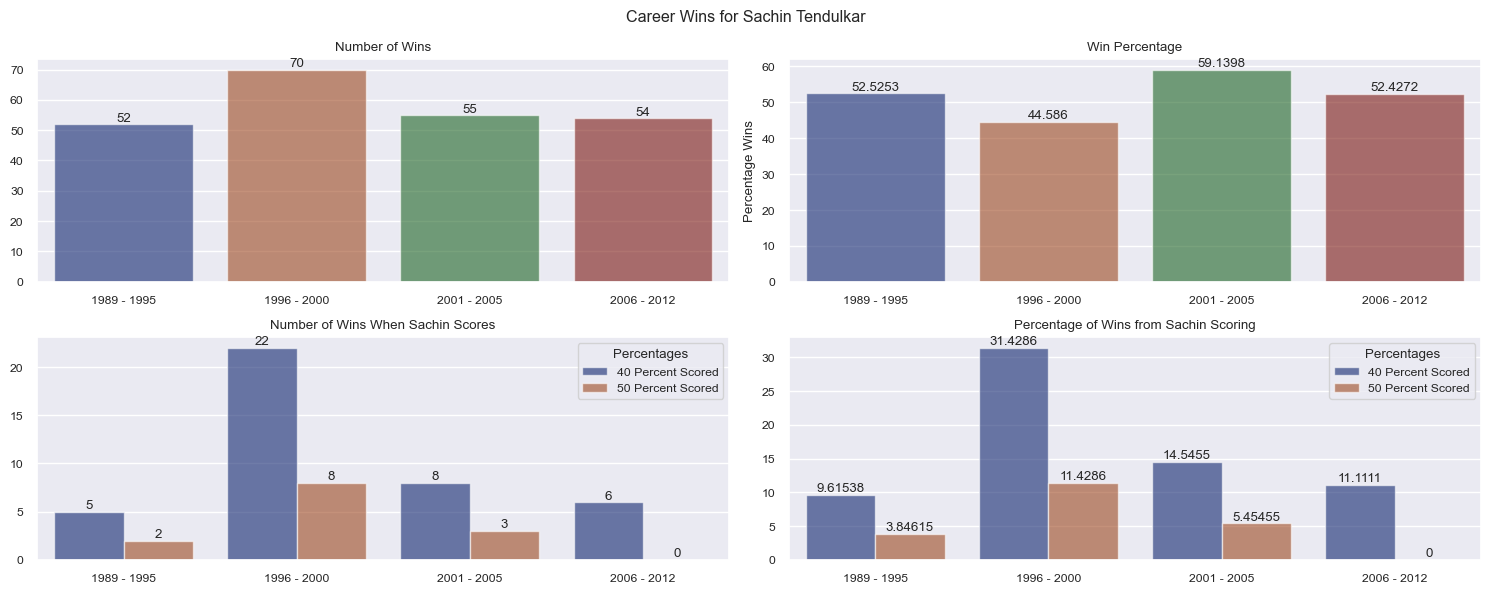

In [43]:
fig, axes = plt.subplots(2, 2, figsize = (15,6))

win_percentages_dict = {}
win_run_percentage_dict = {}
percentage_runs = ["40 Percent Scored", "50 Percent Scored", "40 Percent Scored", "50 Percent Scored", "40 Percent Scored", "50 Percent Scored", "40 Percent Scored", "50 Percent Scored"]

first_phase_wins = len(first_phase[first_phase["Match Result"] == "W"].index)
first_phase_win_percentage = first_phase_wins/len(first_phase.index)*100
first_phase_runs_40_wins = len(first_phase[(first_phase["Match Result"] == "W") & (first_phase["Percentage Scored"] >= 40)])
first_phase_runs_50_wins = len(first_phase[(first_phase["Match Result"] == "W") & (first_phase["Percentage Scored"] >= 50)])
first_phase_runs_40_wins_percentage = first_phase_runs_40_wins/first_phase_wins*100
first_phase_runs_50_wins_percentage = first_phase_runs_50_wins/first_phase_wins*100

second_phase_wins = len(second_phase[second_phase["Match Result"] == "W"].index)
second_phase_win_percentage = second_phase_wins/len(second_phase.index)*100
second_phase_runs_40_wins = len(second_phase[(second_phase["Match Result"] == "W") & (second_phase["Percentage Scored"] >= 40)])
second_phase_runs_50_wins = len(second_phase[(second_phase["Match Result"] == "W") & (second_phase["Percentage Scored"] >= 50)])
second_phase_runs_40_wins_percentage = second_phase_runs_40_wins/second_phase_wins*100
second_phase_runs_50_wins_percentage = second_phase_runs_50_wins/second_phase_wins*100

third_phase_wins = len(third_phase[third_phase["Match Result"] == "W"].index)
third_phase_win_percentage = third_phase_wins/len(third_phase.index)*100
third_phase_runs_40_wins = len(third_phase[(third_phase["Match Result"] == "W") & (third_phase["Percentage Scored"] >= 40)])
third_phase_runs_50_wins = len(third_phase[(third_phase["Match Result"] == "W") & (third_phase["Percentage Scored"] >= 50)])
third_phase_runs_40_wins_percentage = third_phase_runs_40_wins/third_phase_wins*100
third_phase_runs_50_wins_percentage = third_phase_runs_50_wins/third_phase_wins*100

fourth_phase_wins = len(fourth_phase[fourth_phase["Match Result"] == "W"].index)
fourth_phase_win_percentage = fourth_phase_wins/len(fourth_phase.index)*100
fourth_phase_runs_40_wins = len(fourth_phase[(fourth_phase["Match Result"] == "W") & (fourth_phase["Percentage Scored"] >= 40)])
fourth_phase_runs_50_wins = len(fourth_phase[(fourth_phase["Match Result"] == "W") & (fourth_phase["Percentage Scored"] >= 50)])
fourth_phase_runs_40_wins_percentage = fourth_phase_runs_40_wins/fourth_phase_wins*100
fourth_phase_runs_50_wins_percentage = fourth_phase_runs_50_wins/fourth_phase_wins*100

win_percentages_dict["Phases"] = period
win_percentages_dict["Number Wins"] = [first_phase_wins, second_phase_wins, third_phase_wins, fourth_phase_wins]
win_percentages_dict["Percentage Wins"] = [first_phase_win_percentage, second_phase_win_percentage, third_phase_win_percentage, fourth_phase_win_percentage]

win_run_percentage_dict["Phases"] = sum([[s] * n for s, n in zip(period, [2,2,2,2])], [])
win_run_percentage_dict["Percentages"] = percentage_runs
win_run_percentage_dict["Runs to Wins"] = [first_phase_runs_40_wins, first_phase_runs_50_wins, 
                                        second_phase_runs_40_wins, second_phase_runs_50_wins, 
                                        third_phase_runs_40_wins, third_phase_runs_50_wins, 
                                        fourth_phase_runs_40_wins, fourth_phase_runs_50_wins]
win_run_percentage_dict["Percentage Runs to Wins"] = [first_phase_runs_40_wins_percentage, first_phase_runs_50_wins_percentage, 
                                                   second_phase_runs_40_wins_percentage, second_phase_runs_50_wins_percentage, 
                                                   third_phase_runs_40_wins_percentage, third_phase_runs_50_wins_percentage,
                                                   fourth_phase_runs_40_wins_percentage, fourth_phase_runs_50_wins_percentage]

win_percentages_df = pd.DataFrame.from_dict(win_percentages_dict)
win_run_percentage_df = pd.DataFrame.from_dict(win_run_percentage_dict)

sns.barplot(data = win_percentages_df, x = "Phases", y = "Number Wins", palette="dark", alpha = 0.6, ax = axes[0,0])
for container in axes[0,0].containers:
    axes[0,0].bar_label(container)
axes[0,0].set_xlabel("")
axes[0,0].set_title("Number of Wins")
axes[0,0].set_ylabel("")


sns.barplot(data = win_percentages_df, x = "Phases", y = "Percentage Wins", palette="dark", alpha = 0.6, ax = axes[0,1])
for container in axes[0,1].containers:
    axes[0,1].bar_label(container)
axes[0,1].set_xlabel("")
axes[0,1].set_title("Win Percentage")
axes[0,0].set_ylabel("")


sns.barplot(data = win_run_percentage_df, x = "Phases", y = "Runs to Wins", hue = "Percentages", palette="dark", alpha = 0.6, ax = axes[1,0])
for container in axes[1,0].containers:
    axes[1,0].bar_label(container)
axes[1,0].set_xlabel("")
axes[1,0].set_title("Number of Wins When Sachin Scores")
axes[1,0].set_ylabel("")

sns.barplot(data = win_run_percentage_df, x = "Phases", y = "Percentage Runs to Wins", hue = "Percentages", palette="dark", alpha = 0.6, ax = axes[1,1])
for container in axes[1,1].containers:
    axes[1,1].bar_label(container)
axes[1,1].set_xlabel("")
axes[1,1].set_title("Percentage of Wins from Sachin Scoring")
axes[1,1].set_ylabel("")

plt.suptitle("Career Wins for Sachin Tendulkar")
plt.tight_layout()


What is interesting is that despite the the individual achievements and accomplishments of Sachin from 1996-2000 he had the lowest win percentage during this time than any other period in his career (granted this period also had the highest number of wins). Furthermore, whenever his team won during this period, he would score at least 40 % of the team runs in almost 1/3rd of the won matches. 

We already know that he scored at least 40 % of the team total in 20 % of the matches played between 1996 - 2000. From 1996 - 2000 he achieved more wins from scoring at least 40 percent of the team total than he did at any other point in his career combined.

##### 1.6d. Difference between Sachin and teammates during career

In [44]:
# TODO: Find a metric to quantitatively show the difference between Sachin and the rest of the batsmen. 

#### 1.7 Can anyone come close....maybe one (Virat vs. Sachin)

When it comes to One Day International Cricket, this is a debate that many experts have as to whether Sachin Tendulkar's records can be broken by Virat Kohli, in addition to who is "better". While it is difficult to say who is "better" as this is a subjective matter, we can take a look at the numbers/statistics to bring insight to the debate. Based on the analysis we have done comparing Sachin to other batsmen, let us just focus on the two batsmen in question.

Points of comparison:
* Runs and Averages compared to one another
* Percentage contributions
* Ratio of runs to wins
* My own perspective

I would also do a time series prediction on Virat Kohli to predict his number of ODI centuries and total run tally, however this will be done on a separate Virat Kohli specific data analysis

Lastly, while the numbers presented are nice, there are plenty of other statistics that I do not fully have the resources to analyze. Some improvements to the analysis would be the following:
* Because the time that the two played in, it would be a little unfair to do a direct comparison (they only played together for a few year circa. 2008 - 2013), therefore the comparisons made would have to be based on time period
    * Comparison of batting averages in the 90s and 00s versus 00s and 2010s 
    * Bowlers of the different time periods
    * Was batting more difficult back then?
    * How were they compared to their team and contemporary batsmen?

##### 1.7a. Runs and Averages compared to one another

We will compare the runs and averages overall, batting first, and batting second

In [45]:
virat_df = pd.read_csv("C:\\Users\\Sriram Kidambi\\OneDrive\Documents\\Python\\Data Science Stuff\\cricket_project\\player_data\KOHLI.csv")

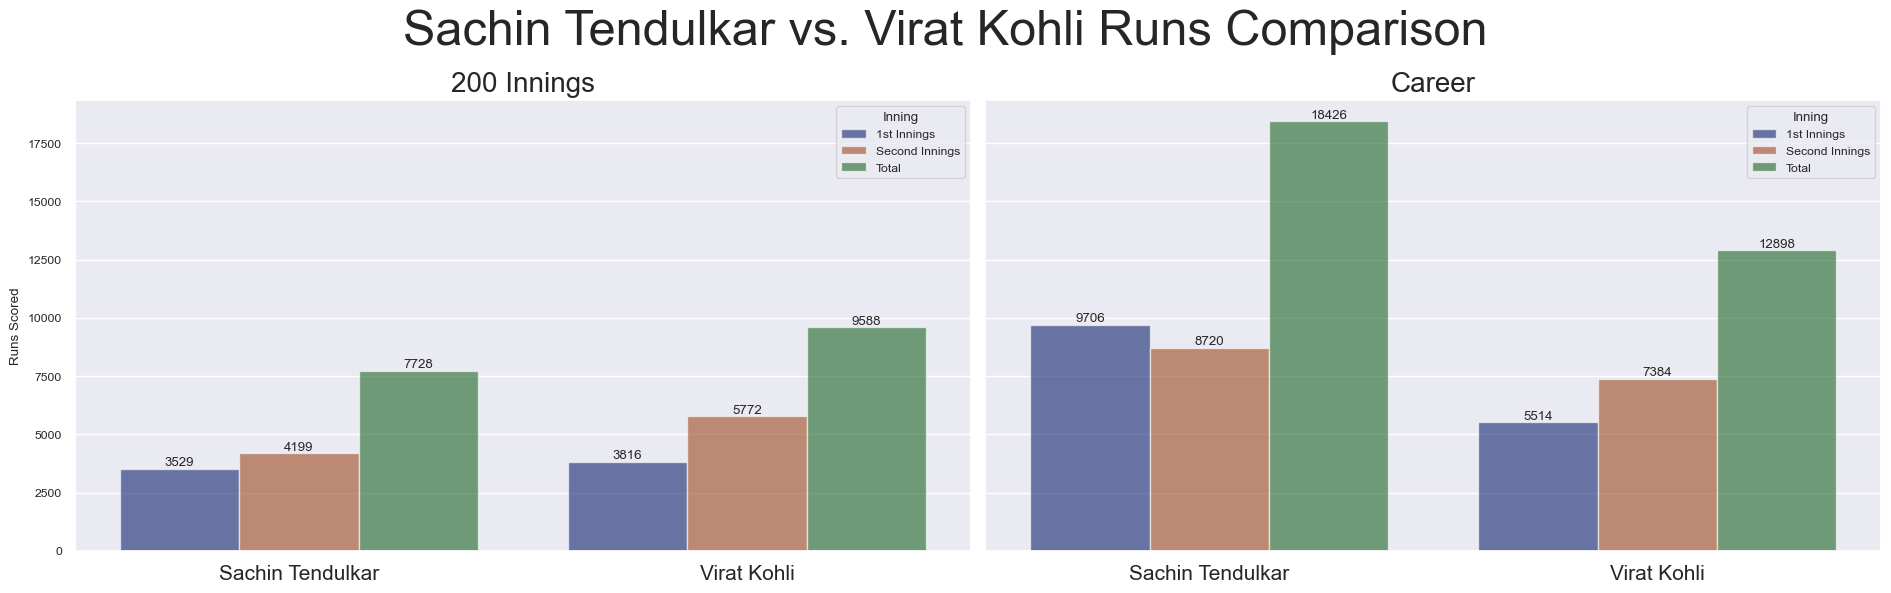

In [46]:
# TODO: Change the Font Size
# Plot the differences in runs between Virat and Sachin (200 Innings and Career) between first and second innings and total
fig, axes = plt.subplots(1, 2, figsize=(19, 6), sharey=True)
# Create runs plot for career
runs_comparison_dict = {}
players = ["Sachin Tendulkar", "Sachin Tendulkar", "Sachin Tendulkar", "Virat Kohli", "Virat Kohli", "Virat Kohli"]
innings = ["1st Innings", "Second Innings", "Total", "1st Innings", "Second Innings", "Total"]
sachin_first_runs = sachin_df[sachin_df["Inns"] == 1]["Runs"].sum()
sachin_second_runs = sachin_df[sachin_df["Inns"] == 2]["Runs"].sum()
sachin_total_runs = sachin_df["Runs"].sum()

virat_first_runs = virat_df[virat_df["Inns"] == 1]["Runs"].sum()
virat_second_runs = virat_df[virat_df["Inns"] == 2]["Runs"].sum()
virat_total_runs = virat_df["Runs"].sum()

runs_comparison_dict["Players"] = players
runs_comparison_dict["Inning"] = innings
runs_comparison_dict["Runs"] = [sachin_first_runs, sachin_second_runs, sachin_total_runs, virat_first_runs, virat_second_runs, virat_total_runs]

runs_comparison_df = pd.DataFrame.from_dict(runs_comparison_dict)

g2 = sns.barplot(data=runs_comparison_df, x = "Players", y = "Runs", hue="Inning", palette="dark", alpha = 0.6, ax=axes[1])
for c in axes[1].containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    axes[1].bar_label(c, labels=labels, label_type='edge')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis = "x", labelsize = 15)
axes[1].set_title("Career", fontsize = 20)


# Create runs plot for 200 innings
runs_200_comparison_dict = {}

players = ["Sachin Tendulkar", "Sachin Tendulkar", "Sachin Tendulkar", "Virat Kohli", "Virat Kohli", "Virat Kohli"]
innings = ["1st Innings", "Second Innings", "Total", "1st Innings", "Second Innings", "Total"]

sachin_200_df = sachin_df.iloc[:200]
sachin_first_200_runs = sachin_200_df[sachin_200_df["Inns"] == 1]["Runs"].sum()
sachin_second_200_runs = sachin_200_df[sachin_200_df["Inns"] == 2]["Runs"].sum()
sachin_total_200_runs = sachin_200_df["Runs"].sum()

virat_200_df = virat_df.iloc[:200]
virat_first_200_runs = virat_200_df[virat_200_df["Inns"] == 1]["Runs"].sum()
virat_second_200_runs = virat_200_df[virat_200_df["Inns"] == 2]["Runs"].sum()
virat_total_200_runs = virat_200_df["Runs"].sum()

runs_200_comparison_dict["Players"] = players
runs_200_comparison_dict["Inning"] = innings
runs_200_comparison_dict["Runs"] = [sachin_first_200_runs, sachin_second_200_runs, sachin_total_200_runs, virat_first_200_runs, virat_second_200_runs, virat_total_200_runs]

runs_comparison_200_df = pd.DataFrame.from_dict(runs_200_comparison_dict)

g1 = sns.barplot(data=runs_comparison_200_df, x = "Players", y = "Runs", hue="Inning", palette="dark", alpha = 0.6, ax=axes[0])
for c in axes[0].containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    axes[0].bar_label(c, labels=labels, label_type='edge')
axes[0].set_xlabel("")
axes[0].set_ylabel("Runs Scored")
axes[0].set_title("200 Innings", fontsize = 20)
axes[0].tick_params(axis = "x", labelsize = 15)

plt.suptitle("Sachin Tendulkar vs. Virat Kohli Runs Comparison", fontsize = 35)
plt.tight_layout()

The above graphs tell us a few things:
1. In the first 200 Innings, Kohli outscores Sachin Tendulkar by a total of almost 2000 runs
2. However, because Sachin played a total of 463 matches to Kohli's 274 matches (and counting), Sachin was able to accumulate more runs over the course of his career, with roughly 5,500 more runs 

Text(0.5, 0.98, 'Sachin Tendulkar vs. Virat Kohli Averages Comparison')

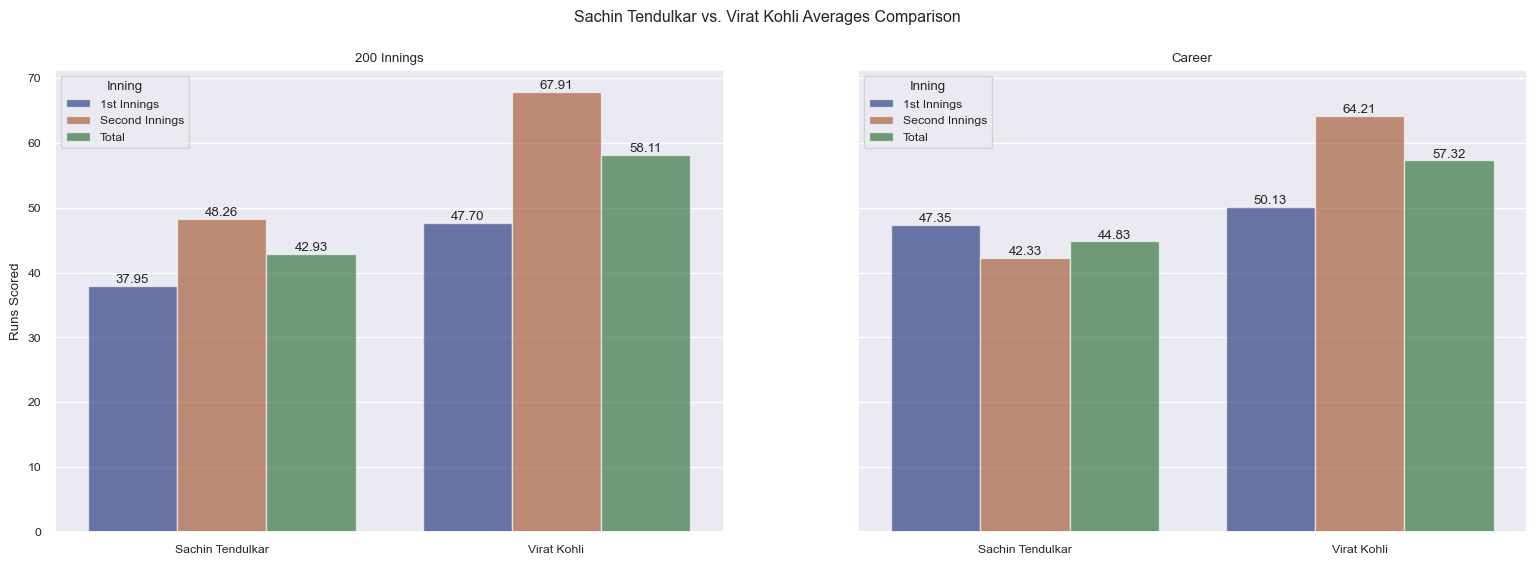

In [47]:
# Plotting the Averages
# Plot the differences in averages between Virat and Sachin (200 Innings and Career) between first and second innings and total

fig, axes = plt.subplots(1, 2, figsize=(19, 6), sharey=True)
sachin_200_df = sachin_df.iloc[:200]
virat_200_df = virat_df.iloc[:200]
# Create averages plot for 200 Innings
averages_comparison_200_dict = {}

sachin_first_200_average = get_career_average_list(sachin_200_df[sachin_200_df["Inns"] == 1])[-1]
sachin_second_200_average = get_career_average_list(sachin_200_df[sachin_200_df["Inns"] == 2])[-1]
sachin_total_200_average = get_career_average_list(sachin_200_df)[-1]

virat_first_200_average = get_career_average_list(virat_200_df[virat_200_df["Inns"] == 1])[-1]
virat_second_200_average = get_career_average_list(virat_200_df[virat_200_df["Inns"] == 2])[-1]
virat_total_200_average = get_career_average_list(virat_200_df)[-1]

averages_comparison_200_dict["Players"] = players
averages_comparison_200_dict["Inning"] = innings
averages_comparison_200_dict["Average"] = [sachin_first_200_average, sachin_second_200_average, sachin_total_200_average, virat_first_200_average, virat_second_200_average, virat_total_200_average]

averages_comparison_200_df = pd.DataFrame.from_dict(averages_comparison_200_dict)

# Create first subplot
g1 = sns.barplot(data=averages_comparison_200_df, x = "Players", y = "Average", hue="Inning", palette="dark", alpha = 0.6, ax=axes[0])
for c in axes[0].containers:
    labels = [f'{v.get_height():.2f}' for v in c]
    axes[0].bar_label(c, labels=labels, label_type='edge')
axes[0].set_xlabel("")
axes[0].set_ylabel("Runs Scored")
axes[0].title.set_text("200 Innings")

# Create averages plot for career
averages_comparison_dict = {}

sachin_first_average = get_career_average_list(sachin_df[sachin_df["Inns"] == 1])[-1]
sachin_second_average = get_career_average_list(sachin_df[sachin_df["Inns"] == 2])[-1]
sachin_total_average = get_career_average_list(sachin_df)[-1]

virat_first_average = get_career_average_list(virat_df[virat_df["Inns"] == 1])[-1]
virat_second_average = get_career_average_list(virat_df[virat_df["Inns"] == 2])[-1]
virat_total_average = get_career_average_list(virat_df)[-1]

averages_comparison_dict["Players"] = players
averages_comparison_dict["Inning"] = innings
averages_comparison_dict["Average"] = [sachin_first_average, sachin_second_average, sachin_total_average, virat_first_average, virat_second_average, virat_total_average]

averages_comparison_df = pd.DataFrame.from_dict(averages_comparison_dict)

# Create second subplot
g2 = sns.barplot(data=averages_comparison_df, x = "Players", y = "Average", hue="Inning", palette="dark", alpha = 0.6, ax=axes[1])
for c in axes[1].containers:
    labels = [f'{v.get_height():.2f}' for v in c]
    axes[1].bar_label(c, labels=labels, label_type='edge')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].title.set_text("Career")

plt.suptitle("Sachin Tendulkar vs. Virat Kohli Averages Comparison")

When looking at the averages, this is where people compare Virat Kohli to Sachin Tendulkar. Kohli is considered a modern day ODI giant because of his incredible average, espcially in the second innings. Across the board, Kohli averages much higher than Sachin, however as stated in the beginning of this section this can come down to numerous factors that I do not have the data to analyze.

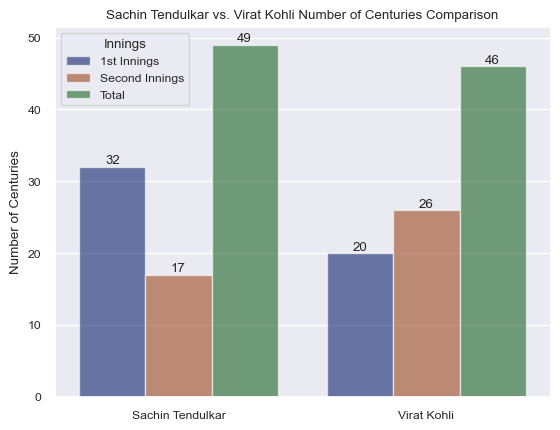

In [48]:
# Quick show of number of centuries

num_centuries_comparison_dict = {}

sachin_first_num_century = len(sachin_df[(sachin_df["Inns"] == 1) & (sachin_df["Runs"] >= 100)].index)
sachin_second_num_century = len(sachin_df[(sachin_df["Inns"] == 2) & (sachin_df["Runs"] >= 100)].index)
sachin_total_num_century = len(sachin_df[sachin_df["Runs"] >= 100].index)

kolhi_first_num_century = len(virat_df[(virat_df["Inns"] == 1) & (virat_df["Runs"] >= 100)].index)
kohli_second_num_century = len(virat_df[(virat_df["Inns"] == 2) & (virat_df["Runs"] >= 100)].index)
kohli_total_num_century = len(virat_df[virat_df["Runs"] >= 100].index)

num_centuries_comparison_dict["Players"] = players
num_centuries_comparison_dict["Innings"] = innings
num_centuries_comparison_dict["Runs"] = [sachin_first_num_century, sachin_second_num_century, sachin_total_num_century, kolhi_first_num_century, kohli_second_num_century, kohli_total_num_century]

num_centuries_comparison_df = pd.DataFrame.from_dict(num_centuries_comparison_dict)

ax = sns.barplot(data=num_centuries_comparison_df, x = "Players", y = "Runs", hue="Innings", palette="dark", alpha = 0.6)
for c in ax.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set_xlabel("")
ax.set_ylabel("Number of Centuries")
ax.title.set_text("Sachin Tendulkar vs. Virat Kohli Number of Centuries Comparison")



Out of all the record Sachin Tendulkar has, this is the one many expect Kohli to break. Sachin ended his career with 49 centuries whereas Kohli is still actively playing and currently has 46 (As of July 12th, 2023). We will see in a separate full Virat Kohli analysis whether he can break this record as well as how many do we predict he will get by the end of his career using a time series analysis of his career. 

##### Ratio/Percentage of Runs to Wins

Will refer to the analysis in the previous section

##### My Own Perspective

In my perspective, there are a few points I will make with regards to the debate between Sachin and Kohli.
1. Out of all the records Sachin has, I believe Kohli will break his ODI century tally of 49, considering Kolhi will be turning 35 this year, he still has a few years left in him to achieve the record and more
2. I do not see Kohli breaking Sachin's ODI runs tally. The fact is that Sachin was so consistent for over two decades that it would be difficult for anyone to beat that record, as well as playing so many matches
3. As I mentioned before, it is too difficult to tell who is "better" (at least in ODI) as further data would be required which is beyond what I can get currently get